In [79]:
import pandas as pd
import pickle
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
results_dict = pickle.load( open( '/Users/b1017579/Documents/PhD/Projects/10-ELECSIM/run/market_forecasting_comparison/data/results/demand_initial_exploration-2020-04-19 09_19_00.102190-select-few-groupby-day-season.csv', "rb" ) )



In [90]:
def dict_to_results_df(results_dict):
    residuals = {}
    for result in results_dict:
        model_type = {}
        flat_list = []
        for i in range(len(results_dict[result])):
            flat_list.append(results_dict[result][i])
        residuals[result] = pd.concat(flat_list[0])

    return residuals

In [91]:
residuals = dict_to_results_df(results_dict)

In [92]:
def plot_dist_plots(multi_differences, title):
    sns.distplot(multi_differences.differences)
    plt.axvline(x=multi_differences.differences.quantile(0.05), linestyle='--', linewidth=2.5, label="5% Percentile", c='b')
    plt.axvline(x=multi_differences.differences.quantile(0.95), linestyle='--', linewidth=2.5, label="95% Percentile", c='purple')
    plt.ylabel("frequency of occurence", labelpad=14)
    plt.title(title)
    plt.axvline(x=0, label="0", c='g')
    plt.axvline(x=-6000, label="Max Tendered National Grid Reserve", c='r')
    plt.axvline(x=6000, label="Max Tendered National Grid Reserve", c='r')
    plt.axvline(x=-2000, label="Average Available Tendered National Grid Reserve", c='b')
    plt.axvline(x=2000, label="Average Available Tendered National Grid Reserve", c='b')

    plt.legend(bbox_to_anchor=(1.01, 1), loc="upper left");
    plt.show()
    plt.close()

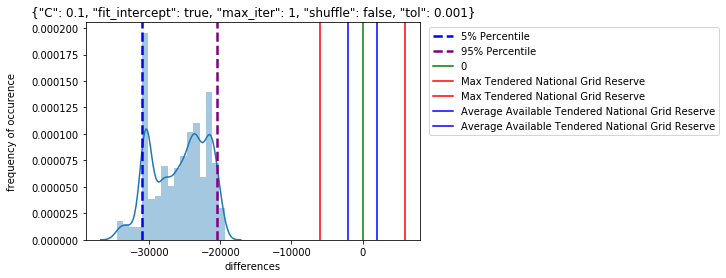

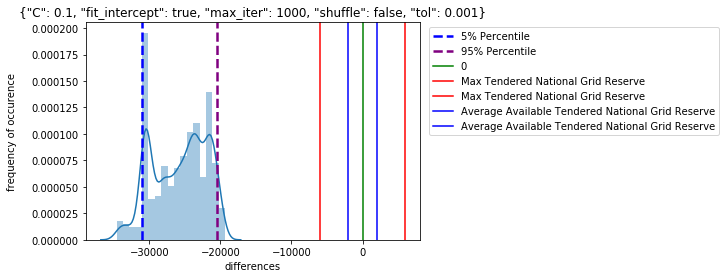

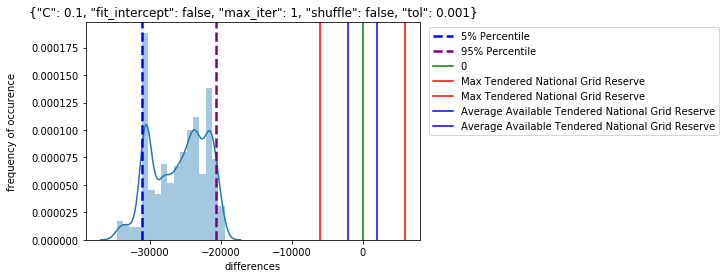

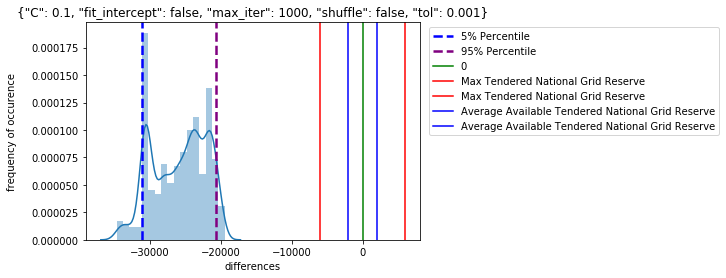

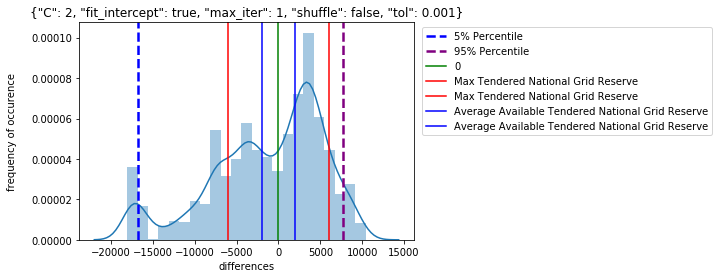

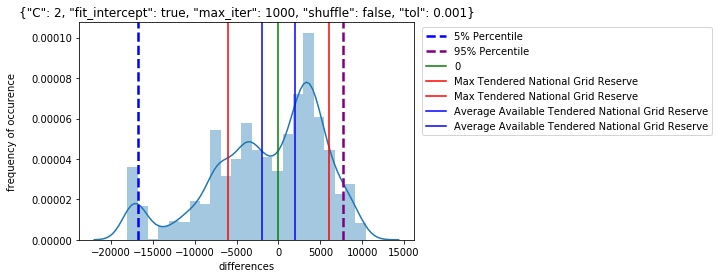

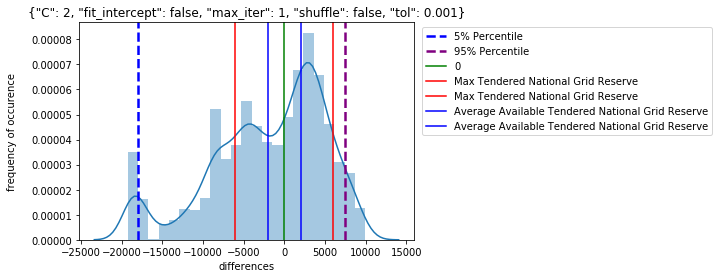

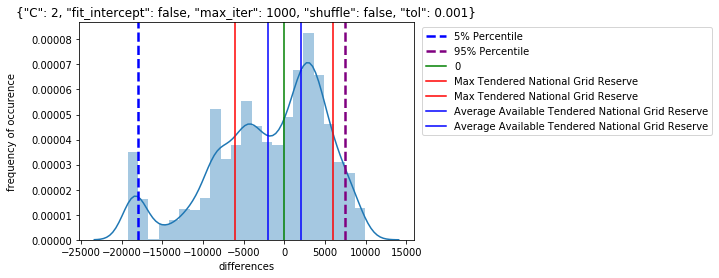

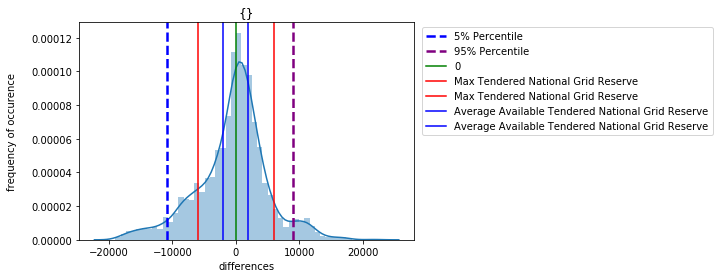

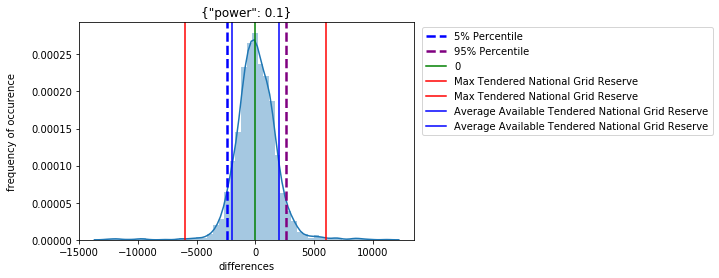

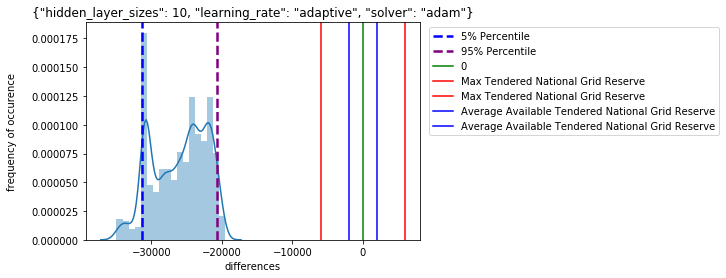

In [93]:
for key in residuals:
    plot_dist_plots(residuals[key], key)